In [1]:
#importing required packages
#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

#baseline linear model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/BAMIDELE/OneDrive/ccf_data.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df.shape

(1296675, 22)

In [9]:
# Descriptive Statistics
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,417192042079641088.000000,70.351035,48800.671097,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465,0.005789
std,1308806447000789248.000000,160.316039,26893.222476,5.075808,13.759077,301956.360689,12841278.423360,5.109788,13.771091,0.075863
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000
25%,180042946491150.000000,9.650000,26237.000000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276,0.000000
50%,3521417320836166.000000,47.520000,48174.000000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392,0.000000
75%,4642255475285942.000000,83.140000,72042.000000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236796,0.000000
max,4992346398065154048.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902,1.000000


In [10]:
# Descriptive Statistics
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
descriptive_stats = df[numeric_cols].describe()
descriptive_stats

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,70.351035,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465
std,160.316039,5.075808,13.759077,301956.360689,12841278.423360,5.109788,13.771091
min,1.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242
25%,9.650000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276
50%,47.520000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392
75%,83.140000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236796
max,28948.900000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902


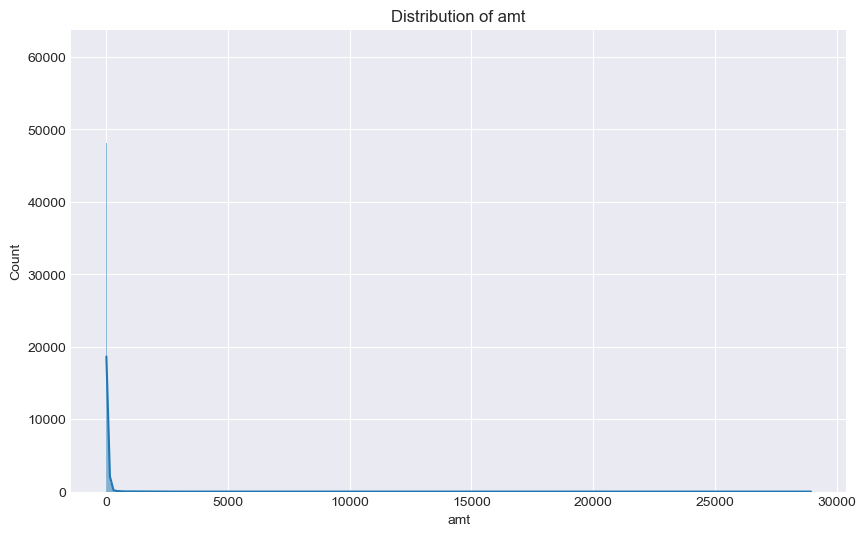

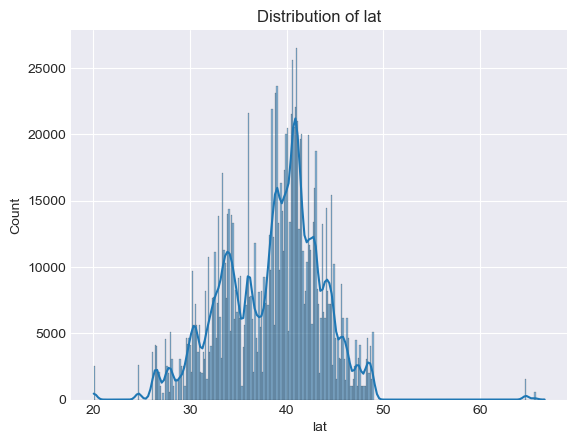

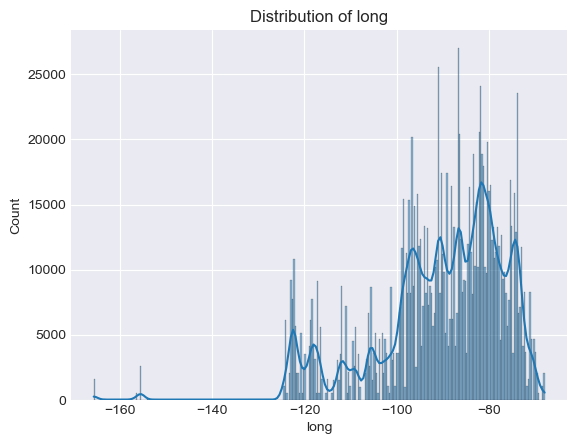

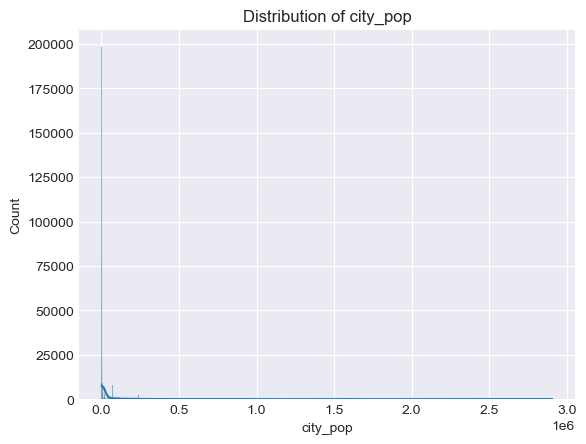

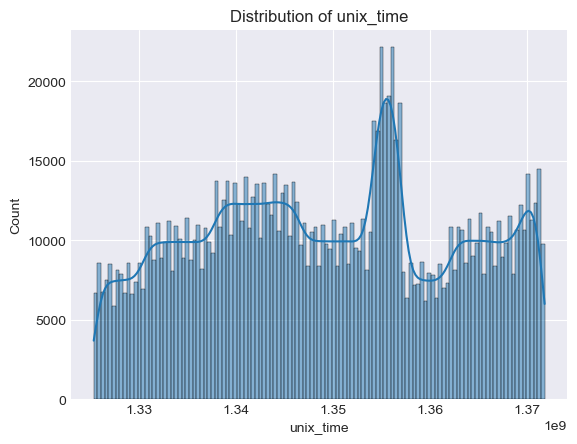

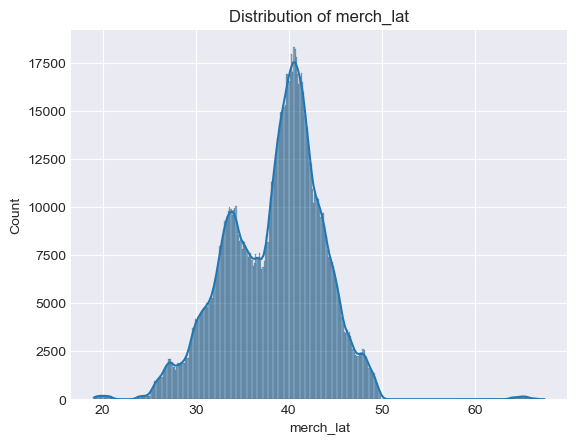

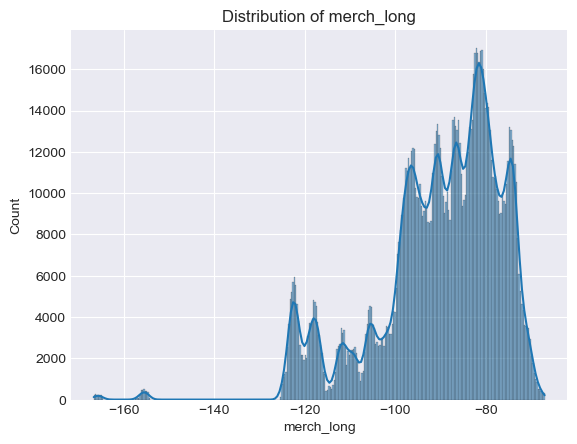

In [11]:
# Data Distribution
plt.figure(figsize=(10, 6))
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [12]:
# Fraud Analysis
fraud_percentage = df['is_fraud'].mean() * 100
print(f'Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%')

Percentage of Fraudulent Transactions: 0.58%


In [13]:
# Hypothesis Testing
from scipy import stats

fraud_transactions = df[df['is_fraud'] == 1]['amt']
non_fraud_transactions = df[df['is_fraud'] == 0]['amt']

t_statistic, p_value = stats.ttest_ind(fraud_transactions, non_fraud_transactions)
print(f'T-Statistic: {t_statistic:.2f}')
print(f'P-Value: {p_value:.4f}')

T-Statistic: 256.08
P-Value: 0.0000


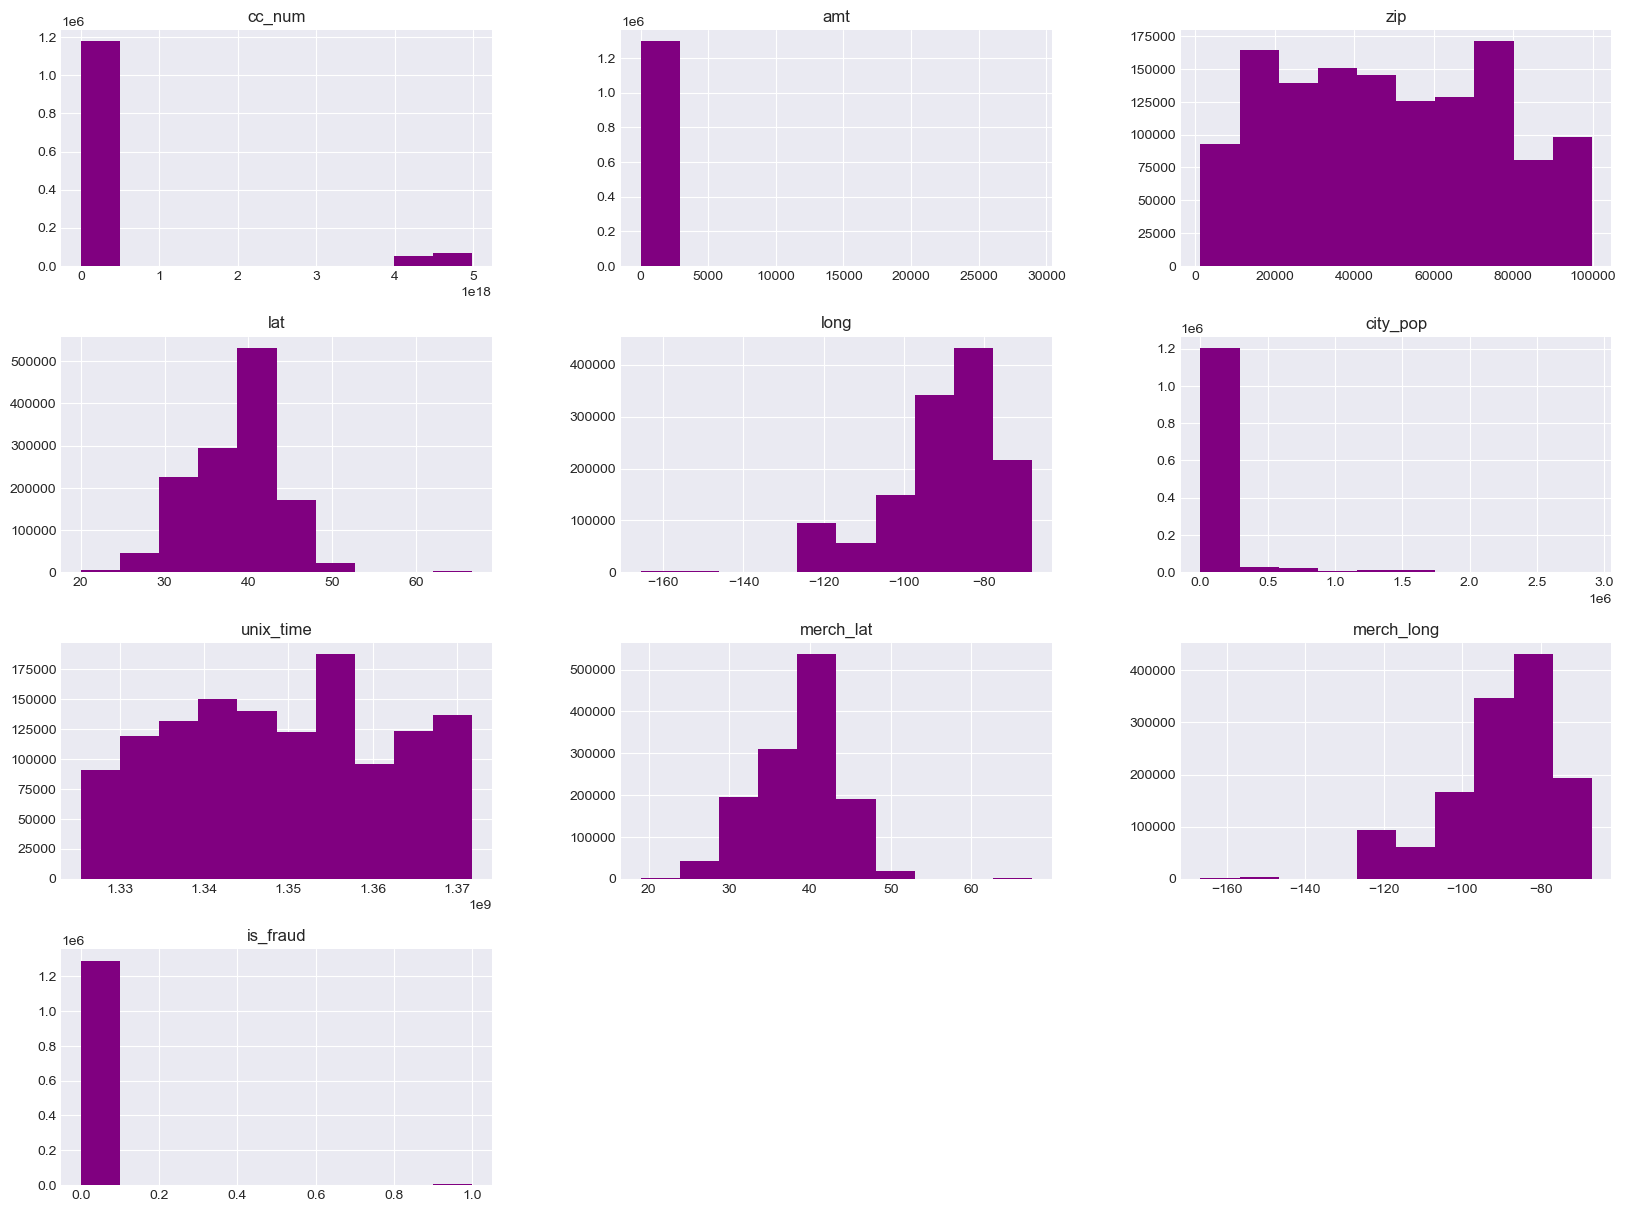

In [14]:
# Plot the distribution of each variable
df.hist(figsize=(20,15), color='purple')
plt.show()

In [15]:
# Check the class balance of the target variable
print(df['is_fraud'].value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


In [16]:
# Analyze the transaction patterns of the customers
grouped_data = df.groupby(['cc_num', 'merchant', 'category'])
grouped_data.size().reset_index(name='count')

,cc_num,merchant,category,count
0,60416207185,fraud_Abbott-Rogahn,entertainment,3
1,60416207185,fraud_Abbott-Steuber,personal_care,4
2,60416207185,fraud_Abernathy and Sons,food_dining,3
3,60416207185,fraud_Abshire PLC,entertainment,2
4,60416207185,"fraud_Adams, Kovacek and Kuhlman",grocery_net,2
...,...,...,...,...
482872,4992346398065154184,fraud_Zemlak Group,misc_net,3
482873,4992346398065154184,"fraud_Zemlak, Tillman and Cremin",personal_care,4
482874,4992346398065154184,fraud_Ziemann-Waters,health_fitness,4
482875,4992346398065154184,"fraud_Zieme, Bode and Dooley",gas_transport,8


In [17]:
# Feature engineering
# Extract useful information from the "trans_date_trans_time" variable
#converting trans_date_trans_time into datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'])
df['day_of_week'] = df['trans_datetime'].dt.dayofweek
df['hour_of_day'] = df['trans_datetime'].dt.hour
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['time_since_last_trans'] = df.groupby(['cc_num'])['unix_time'].diff().fillna(0)

In [18]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_datetime,day_of_week,hour_of_day,trans_year_month,time_since_last_trans
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,1,0,2019-01,0.000000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,1,0,2019-01,0.000000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,1,0,2019-01,0.000000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,1,0,2019-01,0.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,1,0,2019-01,0.000000


In [19]:
# Create a new variable that indicates the distance between the customer's location and the merchant's location
df['dist_customer_merchant'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)

In [20]:
# Create a new variable that indicates the frequency of transactions made by each customer at each merchant
df['freq_trans_customer_merchant'] = df.groupby(['cc_num', 'merchant'])['trans_num'].transform('count')

# Create a new variable that indicates the time difference between the current transaction and the previous transaction made by the same customer at the same merchant
df['time_diff_customer_merchant'] = df.groupby(['cc_num', 'merchant'])['unix_time'].diff().fillna(0)

In [21]:
#finding age
#converting 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0   31.000000
1   41.000000
2   57.000000
3   52.000000
4   33.000000
Name: age, dtype: float64

In [22]:
#dropping variables
df.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_datetime,day_of_week,hour_of_day,trans_year_month,time_since_last_trans,dist_customer_merchant,freq_trans_customer_merchant,time_diff_customer_merchant,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,1,0,2019-01,0.000000,0.872830,4,0.000000,31.000000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,1,0,2019-01,0.000000,0.272310,4,0.000000,41.000000
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,1,0,2019-01,0.000000,0.975845,3,0.000000,57.000000
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,1,0,2019-01,0.000000,0.919802,1,0.000000,52.000000
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,1,0,2019-01,0.000000,0.868505,4,0.000000,33.000000


In [23]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,time_since_last_trans,dist_customer_merchant,freq_trans_customer_merchant,time_diff_customer_merchant,age
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,417192042079641088.000000,70.351035,48800.671097,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465,0.005789,3.070604,12.804858,32460.388633,0.765661,4.010614,5597645.057930,45.999860
std,1308806447000789248.000000,160.316039,26893.222476,5.075808,13.759077,301956.360689,12841278.423360,5.109788,13.771091,0.075863,2.198153,6.817824,47331.144692,0.284748,2.367357,7652413.254541,17.396256
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,0.000000,0.000000,0.000000,0.000239,1.000000,0.000000,14.000000
25%,180042946491150.000000,9.650000,26237.000000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276,0.000000,1.000000,7.000000,6004.000000,0.564958,2.000000,0.000000,33.000000
50%,3521417320836166.000000,47.520000,48174.000000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392,0.000000,3.000000,14.000000,16563.000000,0.798311,4.000000,2163300.000000,44.000000
75%,4642255475285942.000000,83.140000,72042.000000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236796,0.000000,5.000000,19.000000,40239.000000,0.977536,5.000000,8735504.500000,57.000000
max,4992346398065154048.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902,1.000000,6.000000,23.000000,1341471.000000,1.413364,24.000000,46305232.000000,96.000000


In [24]:
#check the percentage of fraudulent data points in the dataset
100*df.is_fraud.value_counts(normalize=True)

0   99.421135
1    0.578865
Name: is_fraud, dtype: float64

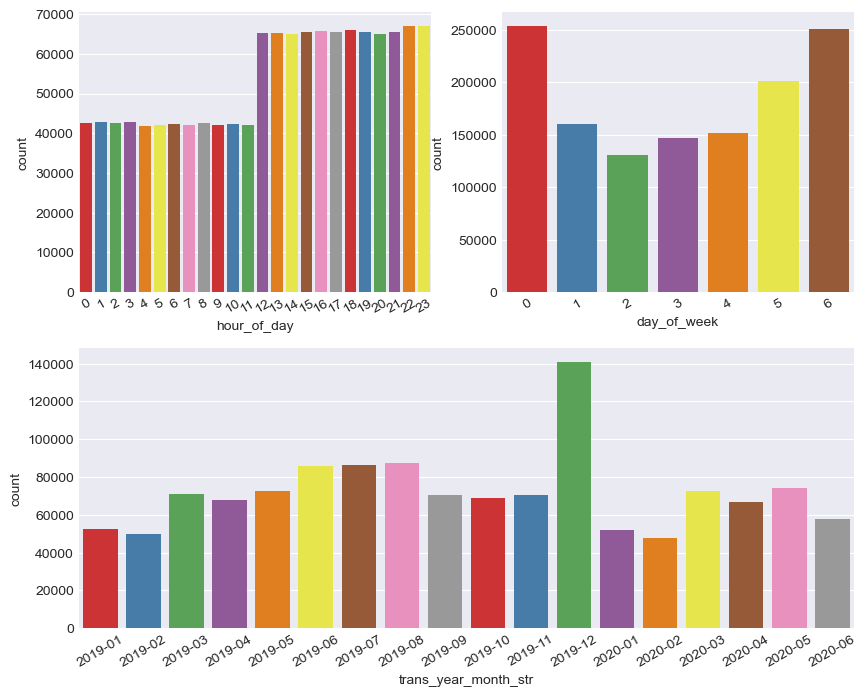

In [25]:
# Generate a visulisation grid 

# Define a custom color palette
custom_palette = sns.color_palette("Set1")

# Convert 'trans_year_month' column to string for plotting
df['trans_year_month_str'] = df['trans_year_month'].astype(str)

# Create subplots
plt.figure(figsize=(10, 8))
plot = [None] * 3

# Plotting the 'trans_hour' feature
plot[0] = sns.countplot(data=df, x='hour_of_day', ax=plt.subplot(221), palette=custom_palette)
# Plotting the 'day_of_week' feature
plot[1] = sns.countplot(data=df, x='day_of_week', ax=plt.subplot(222), palette=custom_palette)
# Plotting the 'trans_year_month_str' feature
plot[2] = sns.countplot(data=df, x='trans_year_month_str', ax=plt.subplot(212), palette=custom_palette)

#set the x-axis labels for the subplots
for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=30)

# Remove the temporary 'trans_year_month_str' column
df.drop('trans_year_month_str', axis=1, inplace=True)

# Show the plots
plt.show()

In [26]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['year_month','num_of_fraud_transactions','fraud_customers']

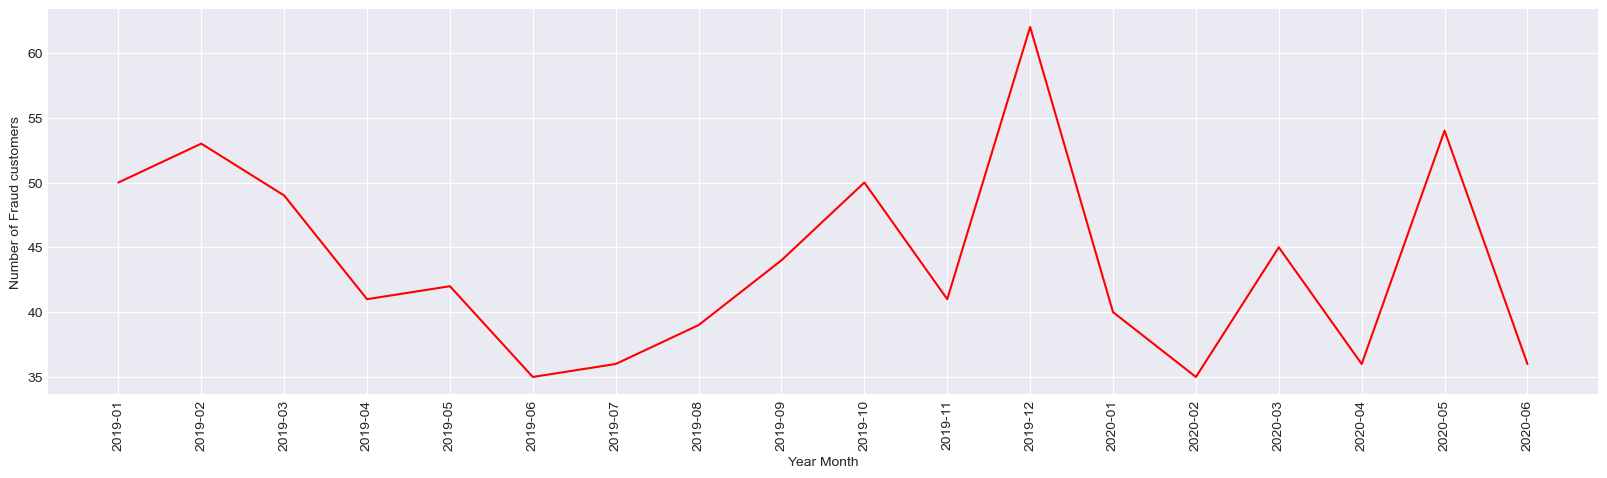

In [27]:
# Create an array for x-axis
x = np.arange(0, len(df_timeline), 1)


# Create a figure and axis 
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# Plot the data with a custom line color
line_color = 'red'  
ax.plot(x, df_timeline['fraud_customers'], color=line_color)

# Customize x-axis 
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['year_month'], rotation=90) # Rotate x-axis labels

# Set labels for x and y axes
ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')

# Save the plot as an image
plt.savefig('fraud_customers_plot.png')
plt.show()

In [28]:
#creating the 'gender' distributed dataframe
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'gender_count']

#creating gender-fraud distribution
df_fraud_gender = df[['gender','trans_num', 'is_fraud']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction Count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'gender_count']], how='inner', on='Gender')

df_fraud_gender['Transaction percentage'] = (df_fraud_gender['Transaction Count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

,Gender,is_fraud,Transaction Count,gender_count,Transaction percentage
0,F,0,706128,709863,99.473842
1,F,1,3735,709863,0.526158
2,M,0,583041,586812,99.357375
3,M,1,3771,586812,0.642625


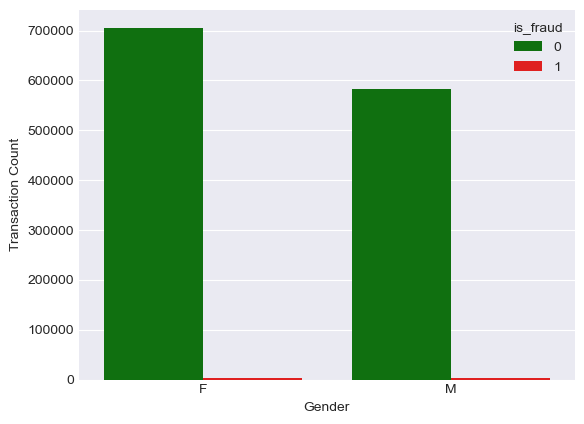

In [29]:
# Define a custom color palette
custom_palette = ["green", "red"]
# Create the bar plot with the custom color palette
sns.barplot(data=df_fraud_gender, y='Transaction Count', x='Gender', hue='is_fraud', palette=custom_palette)
# Save the plot as an image
plt.savefig('fraud_gender_plot.png')
plt.show()

In [30]:
#bin the age feature
for i in range(len(df.age)):
  if df.age[i] <= 30:
    df.age[i] = '< 30'
  elif df.age[i] > 30 and df.age[i] <= 45:
    df.age[i] = '30-45'
  elif df.age[i] > 45 and df.age[i] <= 60:
    df.age[i] = '46-60'
  elif df.age[i] > 60 and df.age[i] <= 75:
    df.age[i] = '61-75'
  else:
    df.age[i] = '> 75'

df.age.head()

0    30-45
1    30-45
2    46-60
3    46-60
4    30-45
Name: age, dtype: object

In [31]:
#constructing the age-transaction count distribution
df_age = df[['age','trans_num']].groupby(['age']).count().reset_index()
df_age.columns = ['age', 'age_count']

#creating the age-fraud distribution
df_fraud_age = df[['age', 'trans_num', 'is_fraud']].groupby(['age','is_fraud']).count().reset_index()
df_fraud_age.columns = ['age', 'is_fraud', 'Transaction count']

df_fraud_age = df_fraud_age.merge(df_age[['age', 'age_count']], how='inner', on='age')

df_fraud_age['Transaction percentage'] = (df_fraud_age['Transaction count']/df_fraud_age['age_count'])*100

df_fraud_age

,age,is_fraud,Transaction count,age_count,Transaction percentage
0,30-45,0,438557,440411,99.579030
1,30-45,1,1854,440411,0.420970
2,46-60,0,334647,336814,99.356618
3,46-60,1,2167,336814,0.643382
4,61-75,0,170800,171904,99.357781
5,61-75,1,1104,171904,0.642219
6,< 30,0,255220,256759,99.400605
7,< 30,1,1539,256759,0.599395
8,> 75,0,89945,90787,99.072554
9,> 75,1,842,90787,0.927446


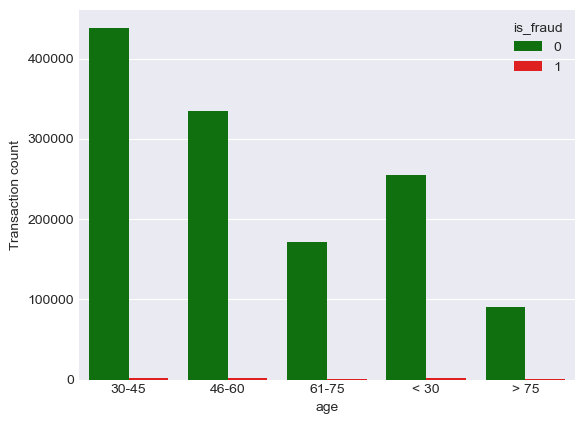

In [32]:
# Define a custom color palette 
custom_palette = ["green", "red"]
# Create the bar plot with the custom color palette
sns.barplot(data=df_fraud_age, y='Transaction count', x='age', hue='is_fraud', palette=custom_palette)
# Save the plot as an image
plt.savefig('fraud_age_plot.png')
plt.show()

In [33]:
# Encode the categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['category'] = label_encoder.fit_transform(df['category'])
df['age'] = label_encoder.fit_transform(df['age'])

In [34]:
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_datetime,day_of_week,hour_of_day,trans_year_month,time_since_last_trans,dist_customer_merchant,freq_trans_customer_merchant,time_diff_customer_merchant,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.970000,0,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,1,0,2019-01,0.000000,0.872830,4,0.000000,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.230000,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,1,0,2019-01,0.000000,0.272310,4,0.000000,0
2,38859492057661,fraud_Lind-Buckridge,0,220.110000,1,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,1,0,2019-01,0.000000,0.975845,3,0.000000,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.000000,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,1,0,2019-01,0.000000,0.919802,1,0.000000,1
4,375534208663984,fraud_Keeling-Crist,9,41.960000,1,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,1,0,2019-01,0.000000,0.868505,4,0.000000,0


In [35]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_datetime',
       'day_of_week', 'hour_of_day', 'trans_year_month',
       'time_since_last_trans', 'dist_customer_merchant',
       'freq_trans_customer_merchant', 'time_diff_customer_merchant', 'age'],
      dtype='object')

In [36]:
#removing unnecessary variables
df.drop([ 'cc_num','street','city','state','job'], axis=1, inplace=True)

In [37]:
# Calculate correlations
df_random_under_corr = df.corr()
df_random_under_corr

,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,time_since_last_trans,dist_customer_merchant,freq_trans_customer_merchant,time_diff_customer_merchant,age
category,1.000000,0.030867,-0.028259,0.002371,-0.008660,-0.000767,0.009386,0.000182,-0.008519,-0.000736,0.020205,-0.001104,0.158323,-0.010097,0.001394,-0.066398,-0.004601,-0.011024
amt,0.030867,1.000000,0.001034,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,-0.001001,-0.022811,-0.003370,-0.001232,0.000814,-0.003802,-0.015367
gender,-0.028259,0.001034,1.000000,-0.065951,0.042935,0.050404,-0.028649,-0.000960,0.042645,0.050350,0.007642,-0.000914,-0.037835,0.056230,0.000265,-0.122418,0.002769,0.013103
zip,0.002371,0.001843,-0.065951,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,-0.001353,0.005938,-0.004804,-0.001619,0.016852,-0.001363,-0.018434
lat,-0.008660,-0.001926,0.042935,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,0.000498,-0.011508,0.008049,0.000208,-0.003997,-0.001047,0.061182
long,-0.000767,-0.000187,0.050404,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,0.001593,-0.002290,0.001652,0.001728,-0.008669,0.001052,0.002006
city_pop,0.009386,0.005818,-0.028649,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,0.002439,0.020381,0.002307,-0.000208,0.004460,-0.000746,-0.057103
unix_time,0.000182,-0.000293,-0.000960,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,-0.029284,0.000756,-0.031399,-0.000975,0.000410,0.456989,-0.000980
merch_lat,-0.008519,-0.001873,0.042645,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,0.000263,-0.011378,0.008065,0.000094,-0.003840,-0.000864,0.060871
merch_long,-0.000736,-0.000151,0.050350,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,0.001553,-0.002325,0.001638,0.001761,-0.008718,0.000993,0.002028


In [38]:
#function to return highly correlated column above a threshold
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr() #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr

In [39]:
#getting the features with correlation above 85%
corr_features = correlation(df,0.85)
corr_features

{'merch_lat', 'merch_long'}

In [40]:
#removing highly correlated and other unnecessary variables
df.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long','merchant','trans_num','trans_datetime','trans_year_month'],
            axis=1, inplace=True)

In [41]:
# Calculate correlations
df_random_under_corr = df.corr()
df_random_under_corr

,category,amt,gender,is_fraud,day_of_week,hour_of_day,time_since_last_trans,dist_customer_merchant,freq_trans_customer_merchant,time_diff_customer_merchant,age
category,1.000000,0.030867,-0.028259,0.020205,-0.001104,0.158323,-0.010097,0.001394,-0.066398,-0.004601,-0.011024
amt,0.030867,1.000000,0.001034,0.219404,-0.001001,-0.022811,-0.003370,-0.001232,0.000814,-0.003802,-0.015367
gender,-0.028259,0.001034,1.000000,0.007642,-0.000914,-0.037835,0.056230,0.000265,-0.122418,0.002769,0.013103
is_fraud,0.020205,0.219404,0.007642,1.000000,0.001739,0.013799,-0.018316,0.000434,-0.029869,-0.010051,0.014347
day_of_week,-0.001104,-0.001001,-0.000914,0.001739,1.000000,0.000219,0.018656,0.000546,0.003129,-0.013252,0.011490
hour_of_day,0.158323,-0.022811,-0.037835,0.013799,0.000219,1.000000,-0.063518,-0.000752,0.002772,0.007572,-0.034557
time_since_last_trans,-0.010097,-0.003370,0.056230,-0.018316,0.018656,-0.063518,1.000000,0.000980,-0.185045,-0.033315,0.045353
dist_customer_merchant,0.001394,-0.001232,0.000265,0.000434,0.000546,-0.000752,0.000980,1.000000,0.000773,-0.001976,-0.001499
freq_trans_customer_merchant,-0.066398,0.000814,-0.122418,-0.029869,0.003129,0.002772,-0.185045,0.000773,1.000000,0.005310,-0.068268
time_diff_customer_merchant,-0.004601,-0.003802,0.002769,-0.010051,-0.013252,0.007572,-0.033315,-0.001976,0.005310,1.000000,-0.004854


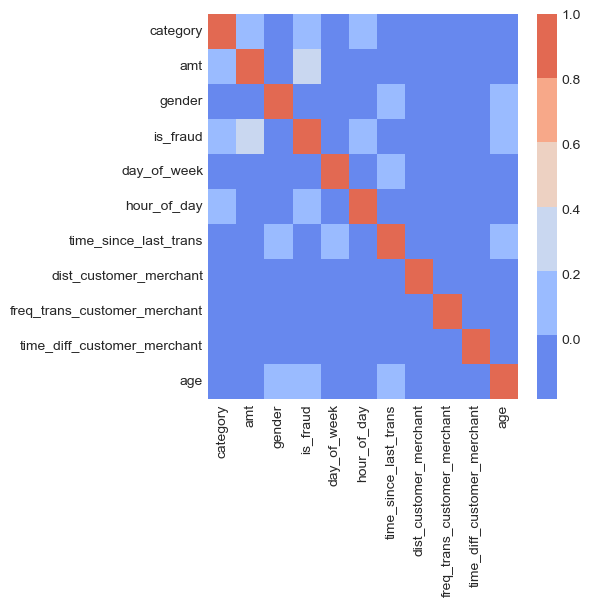

In [42]:
# Set the color palette
custom_palette = sns.color_palette("coolwarm")

# Plot the correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df_random_under_corr, cmap=custom_palette)
plt.show()

In [54]:
df.columns

Index(['category', 'amt', 'gender', 'is_fraud', 'day_of_week', 'hour_of_day',
       'time_since_last_trans', 'dist_customer_merchant',
       'freq_trans_customer_merchant', 'time_diff_customer_merchant', 'age'],
      dtype='object')

In [55]:
df.shape

(1296675, 11)

In [56]:
#split X and Y
X = df[features_name]
y = df['is_fraud']

In [57]:
# Perform label encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [58]:
# Perform normalisation on numerical variables
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [59]:
# Perform SMOTE to handle class imbalance
smote = RandomUnderSampler()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [60]:
# Convert the resampled target array to a DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['is_fraud'])

# Check the value distribution
value_counts = y_resampled_df['is_fraud'].value_counts()
print(value_counts)

0    7506
1    7506
Name: is_fraud, dtype: int64


In [61]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)

In [62]:
# Fit the Random Forest model
rf_model.fit(X_resampled, y_resampled)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [53]:
feature_importance_df

,Feature,Importance
1,hour_of_day,0.674885
0,category,0.254532
2,age,0.070583


In [63]:
# Define a list of features that are related to is_fraud causes
features_name = [
   'category', 'hour_of_day', 'age'
]

In [64]:
# Select the top 10 most important features
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Filter the data to keep only the top features
X_top_features = X_resampled[top_features]

# Initialize the Random Forest model with the top features
rf_model_top = RandomForestClassifier(random_state=42)

# Perform cross-validation on the model with top features
rf_scores_top = cross_val_score(rf_model_top, X_top_features, y_resampled, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Random Forest CV Scores (Top Features):", rf_scores_top)

Random Forest CV Scores (Top Features): [0.81691079 0.83288948 0.85009993 0.83810793 0.84410393 0.84277149
 0.83344437 0.83211193 0.84543638 0.83610926]


In [65]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)

# List of models and their names
models = [rf_model, dt_model, svm_model]
model_names = ['Random Forest', 'Decision Tree', 'SVM']

# Loop through the models
for model, name in zip(models, model_names):
    # Perform k-fold cross-validation and predict on the whole dataset
    y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=10)
    
    # Generate classification report
    report = classification_report(y_resampled, y_pred)
    
    print(f"Classification Report for {name}:\n{report}\n")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      7506
           1       0.82      0.87      0.84      7506

    accuracy                           0.84     15012
   macro avg       0.84      0.84      0.84     15012
weighted avg       0.84      0.84      0.84     15012


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      7506
           1       0.82      0.87      0.84      7506

    accuracy                           0.84     15012
   macro avg       0.84      0.84      0.84     15012
weighted avg       0.84      0.84      0.84     15012


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      7506
           1       0.67      0.61      0.64      7506

    accuracy                           0.65     15012
   macro avg 

Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5999
           1       0.83      0.89      0.86      6010

    accuracy                           0.85     12009
   macro avg       0.85      0.85      0.85     12009
weighted avg       0.85      0.85      0.85     12009


Classification Report for Random Forest (Validation):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1507
           1       0.81      0.87      0.84      1496

    accuracy                           0.83      3003
   macro avg       0.84      0.83      0.83      3003
weighted avg       0.84      0.83      0.83      3003




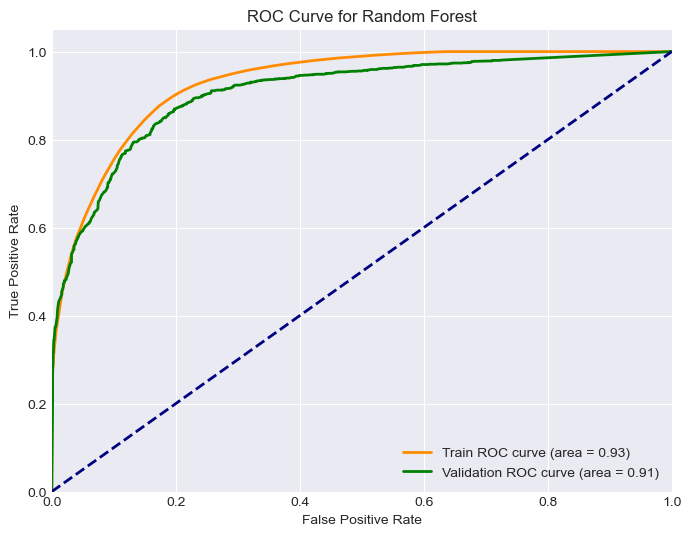

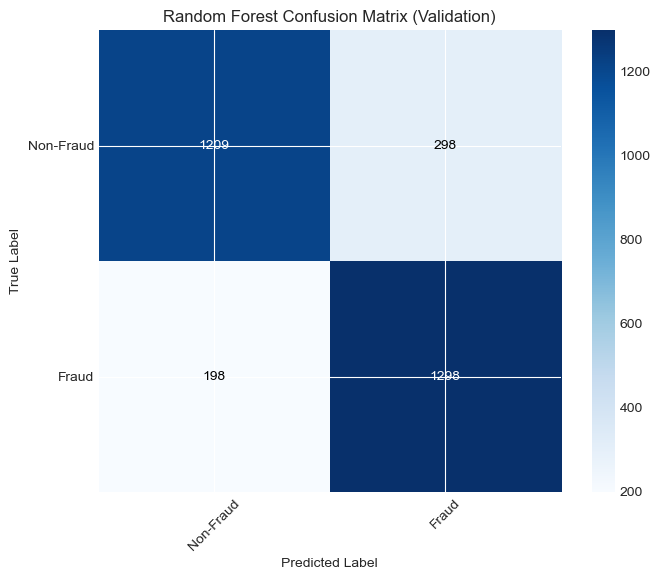

Classification Report for Decision Tree (Train):
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5999
           1       0.83      0.88      0.86      6010

    accuracy                           0.85     12009
   macro avg       0.85      0.85      0.85     12009
weighted avg       0.85      0.85      0.85     12009


Classification Report for Decision Tree (Validation):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1507
           1       0.82      0.86      0.84      1496

    accuracy                           0.83      3003
   macro avg       0.84      0.83      0.83      3003
weighted avg       0.84      0.83      0.83      3003




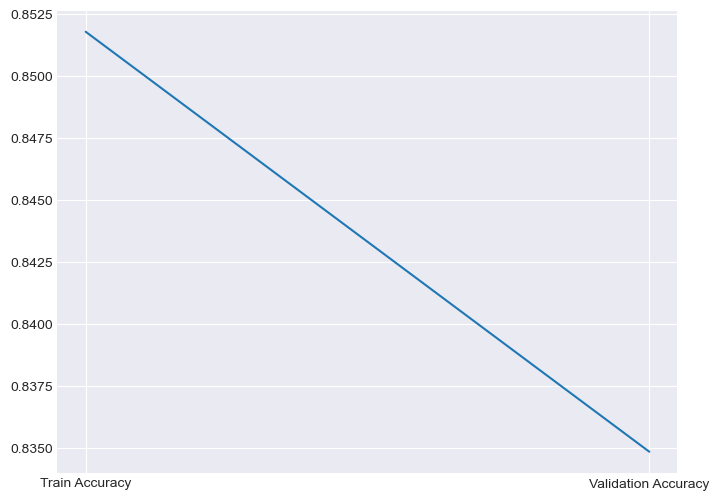

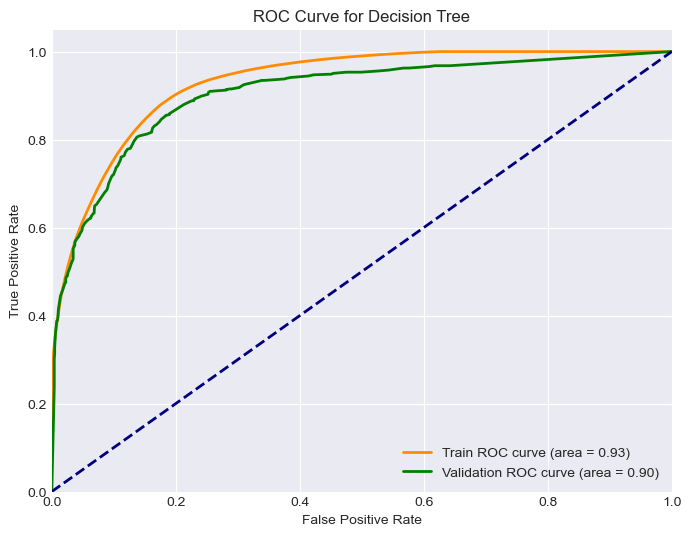

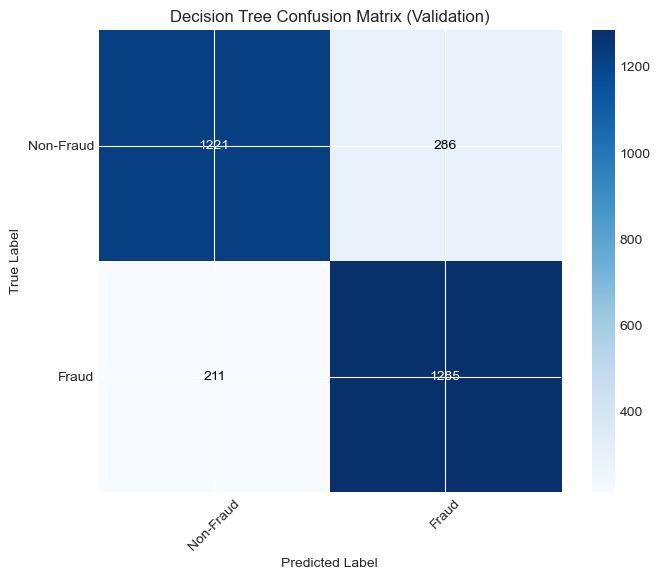

Classification Report for SVM (Train):
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      5999
           1       0.66      0.61      0.64      6010

    accuracy                           0.65     12009
   macro avg       0.65      0.65      0.65     12009
weighted avg       0.65      0.65      0.65     12009


Classification Report for SVM (Validation):
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1507
           1       0.67      0.63      0.65      1496

    accuracy                           0.66      3003
   macro avg       0.66      0.66      0.66      3003
weighted avg       0.66      0.66      0.66      3003




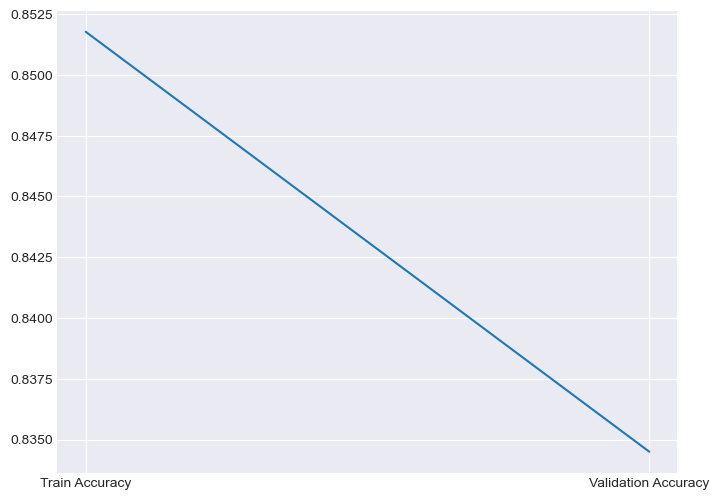

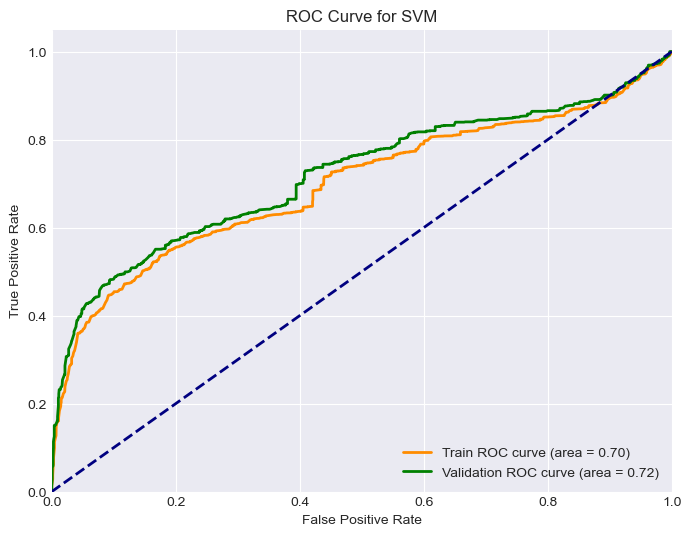

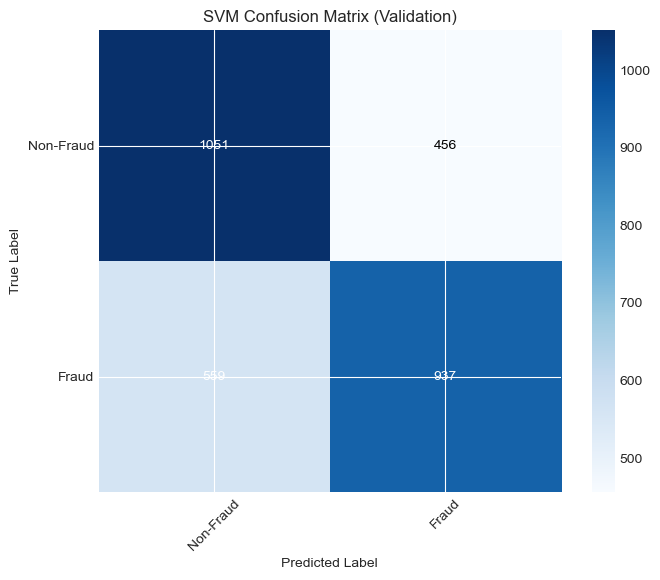

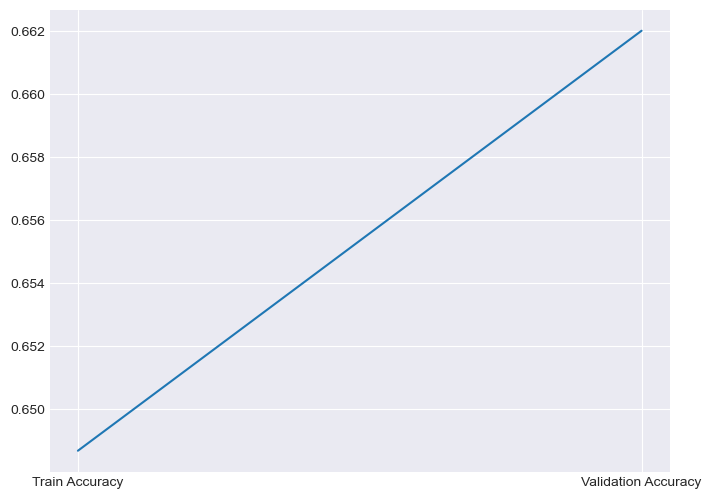

In [66]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Enable probability estimates for ROC curve

# List of models and their names
models = [rf_model, dt_model, svm_model]
model_names = ['Random Forest', 'Decision Tree', 'SVM']

for model, name in zip(models, model_names):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predictions on both train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Generate classification report for train and validation
    train_report = classification_report(y_train, y_train_pred)
    val_report = classification_report(y_val, y_val_pred)
    
    print(f"Classification Report for {name} (Train):\n{train_report}\n")
    print(f"Classification Report for {name} (Validation):\n{val_report}\n")
    
    # Plot ROC Curve and calculate AUC if model supports probability estimates
    if hasattr(model, 'predict_proba'):
        y_train_scores = model.predict_proba(X_train)[:, 1]
        y_val_scores = model.predict_proba(X_val)[:, 1]
        
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_scores)
        roc_auc_train = auc(fpr_train, tpr_train)
        
        fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_scores)
        roc_auc_val = auc(fpr_val, tpr_val)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
        plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix (Validation)")
    plt.colorbar()
    class_names = ["Non-Fraud", "Fraud"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Train and Validation Accuracy Plot
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(['Train Accuracy', 'Validation Accuracy'], [train_accuracy, val_accuracy])
